In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from codon_distance import *

In [2]:
class Codon:

    nts = "ACGT"
    codon_forward_map = get_codon_dict()
    codons = get_codons()
    code_values = get_code_values()

    def __init__(self, seq: str):
        self.seq = seq
        self.code = Codon.codon_forward_map[seq]
    
    def __str__(self) -> str:
        return f"Codon={self.seq}"
    
    def __repr__(self) -> str:
        return self.__str__()

    def neighborhood_len(self) -> int:
        return len(self.neighborhood())
    
    def code_neighborhood_len(self) -> int:
        return len(self.code_neighborhood())

    def neighborhood(self) -> list:
        """Returns list of 1-edit distance neighbor codons."""
        
        if hasattr(self, "neighbors"):
            return self.neighbors[:]

        neighbors = []
        for nt in Codon.nts:
            for i, codon_nt in enumerate(self.seq):
                if codon_nt == nt:
                    continue
                neighbors.append(
                    Codon(
                        self.seq[:i] + nt + self.seq[i+1:]
                    )
                )
        self.neighbors = neighbors
        return neighbors[:]
    
    def code_neighborhood(self) -> list:
        """Returns amino acids and codon codes for 1-edit neighbors."""
        
        if hasattr(self, "code_neighbors"):
            return self.code_neighbors[:]
        
        neighbors = self.neighborhood()
        code_neighbors =  list(
            set(map(lambda codon: codon.code, neighbors))
        )

        self.code_neighbors = code_neighbors
        return code_neighbors[:]
    
    def neighborhood_series(self) -> pd.Series:
        """"""
        neighbors = self.neighborhood()
        is_neighbor = []
        for codon in Codon.codons:
            if codon in map(lambda c: c.seq, neighbors):
                is_neighbor.append(1)
            else:
                is_neighbor.append(0)
        return pd.Series(data=is_neighbor, index = Codon.codons)
    
    def code_neighborhood_series(self) -> pd.Series:
        """"""
        code_neighbors = self.code_neighborhood()
        is_neighbor = []
        for code_val in Codon.code_values:
            if code_val in code_neighbors:
                is_neighbor.append(1)
            else:
                is_neighbor.append(0)
        return pd.Series(data=is_neighbor, index = Codon.code_values)

<AxesSubplot:>

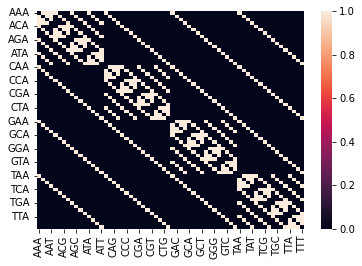

In [3]:
series = []
codons = get_codons()
for codon in codons:
    series.append(Codon(seq=codon).neighborhood_series())

df = pd.concat(series, axis=1)
df.columns = codons
sns.heatmap(df)

<AxesSubplot:>

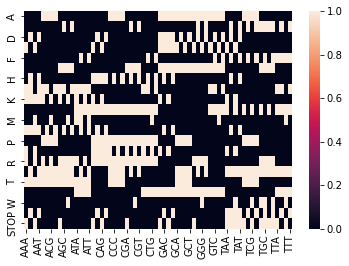

In [4]:
series = []
codons = get_codons()
for codon in codons:
    series.append(Codon(seq=codon).code_neighborhood_series())

df = pd.concat(series, axis=1)
df.columns = codons
sns.heatmap(df)

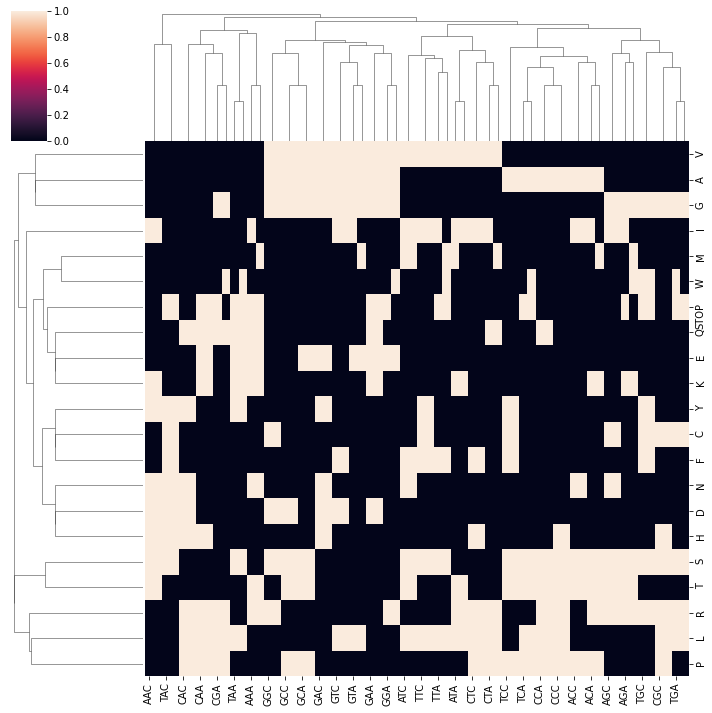

In [6]:
sns.clustermap(df)